In [127]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.tsa.arima.model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('global_mfdexport_1month_18072010_18072023.txt' , sep=';')
df = pd.read_csv('global_mfdexport_1month_18072010_18072023.txt',sep=';')\
    .rename(columns={'<DATE>':'DATE','<OPEN>':'OPEN','<LOW>':'LOW','<CLOSE>':'CLOSE','<VOL>':'VOL','<HIGH>':'HIGH','<TICKER>':'TICKER'})\
    .drop(['<PER>','<TIME>','<OPENINT>'],1)
df.DATE = pd.to_datetime(df.DATE,format="%Y%m%d")

/tmp/ipykernel_8512/3485249205.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  .drop(['<PER>','<TIME>','<OPENINT>'],1)


In [3]:
companies = df['TICKER'].unique()

/tmp/ipykernel_8512/268017052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
/tmp/ipykernel_8512/268017052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.replace([np.inf, -np.inf], 100, inplace=True)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yu

<function matplotlib.pyplot.show(close=None, block=None)>

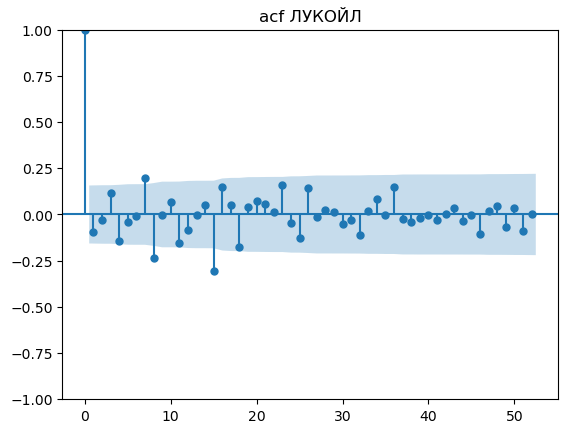

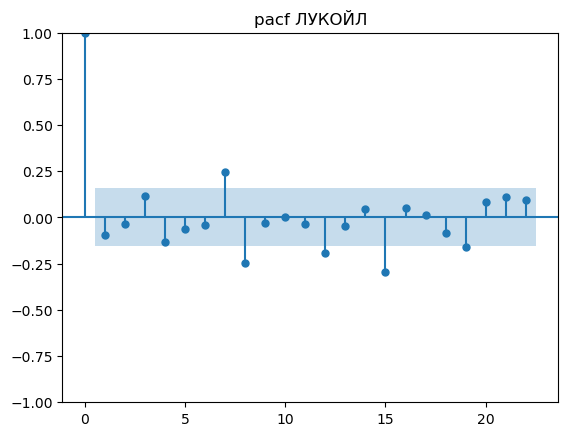

In [4]:
company_df = df.loc[df['TICKER'] == 'ЛУКОЙЛ']
company_df['earn'] = (company_df.CLOSE-company_df.CLOSE.shift(1).fillna(0))/company_df.CLOSE.shift(1).fillna(0)
company_df.replace([np.inf, -np.inf], 100, inplace=True)
company_df = company_df.loc[company_df.earn != 100]
series = company_df[['DATE','earn']].set_index('DATE')
plot_acf(series , lags = len(company_df.TICKER)/3,title='acf ЛУКОЙЛ')
sm.graphics.tsa.plot_pacf(series,title='pacf ЛУКОЙЛ')
plt.show

In [5]:
res_1 = statsmodels.tsa.stattools.arma_order_select_ic(series.earn, ic=["aic", "bic"], trend="c")

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/py

In [6]:
print('Параметры для ЛУКЙОЛ по aic={} \nПараметры для ЛУКОЙЛ по bic={}'.format(res_1.aic_min_order,res_1.bic_min_order))

Параметры для ЛУКЙОЛ по aic=(2, 2) 
Параметры для ЛУКОЙЛ по bic=(0, 0)


In [7]:
res_2 = statsmodels.tsa.stattools.arma_order_select_ic(series.earn, ic=["aic", "bic"], trend="n")

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
print('Параметры для ЛУКЙОЛ по aic={} \nПараметры для ЛУКОЙЛ по bic={}'.format(res_2.aic_min_order,res_2.bic_min_order))

Параметры для ЛУКЙОЛ по aic=(2, 2) 
Параметры для ЛУКОЙЛ по bic=(2, 2)


In [9]:
model = ARIMA(series, order=(2,0,2))
model_fit = model.fit()

/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/daniil/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   earn   No. Observations:                  156
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 200.486
Date:                Fri, 28 Jul 2023   AIC                           -388.972
Time:                        13:57:00   BIC                           -370.673
Sample:                    08-01-2010   HQIC                          -381.540
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.005      1.880      0.060      -0.000       0.020
ar.L1         -0.4762      0.043    -10.956      0.000      -0.561      -0.391
ar.L2         -0.9001      0.045    -20.082      0.0

In [11]:
forecasts = pd.Series(model_fit.forecasts[0], index=series.index)

Text(0.5, 0, 'Years')

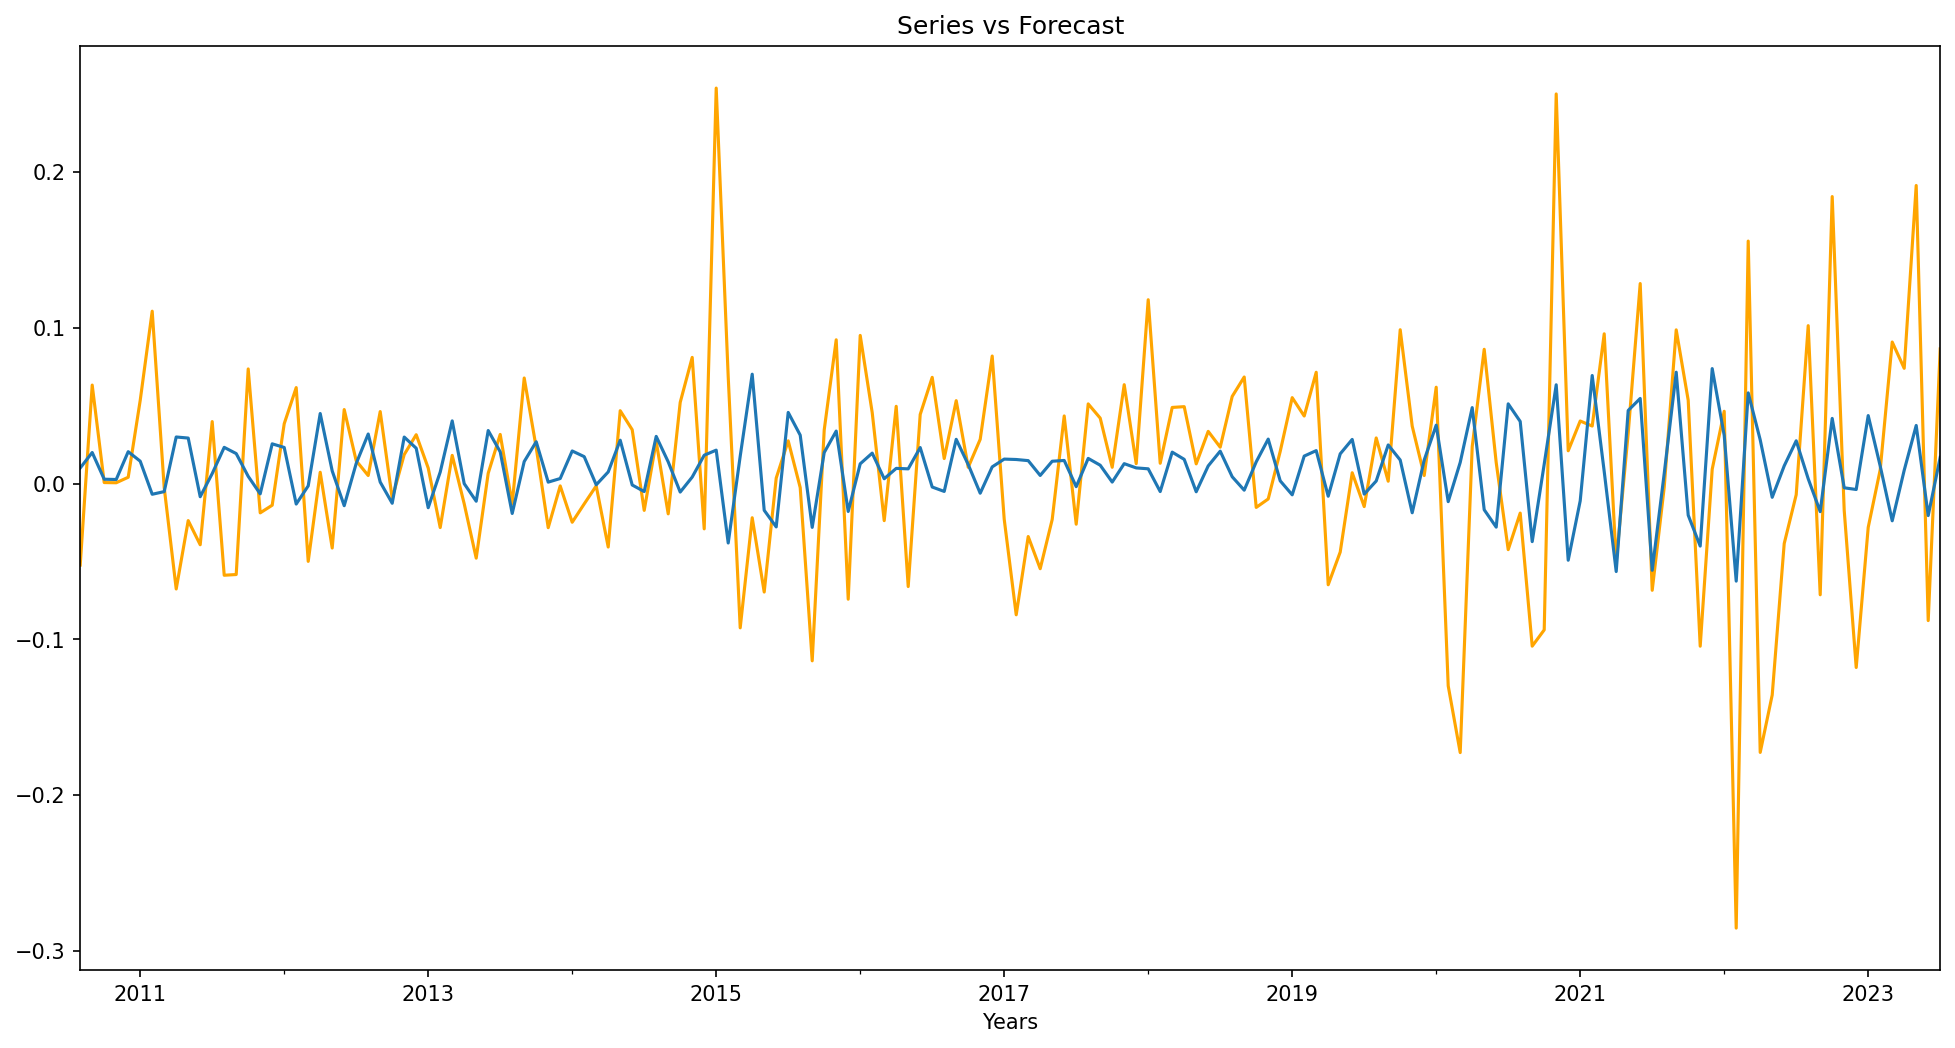

In [12]:
plt.figure(figsize=(16, 8), dpi=150)

series['earn'].plot(label='series', color='orange')
forecasts.plot(label='forecast')

plt.title('Series vs Forecast')
  
plt.xlabel('Years')

<Axes: xlabel='DATE'>

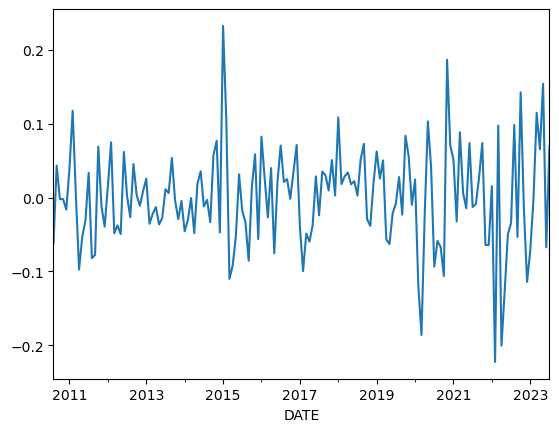

In [13]:
model_fit.resid.plot()

In [14]:
pred = model.predict(nsteps = 1)

TypeError: Model.predict() missing 1 required positional argument: 'params'

ПРОБУЕМ ИСПОЛЬЗОВАТЬ ARMAGARCH МОДЕЛЬ

In [15]:
import armagarch as ag
import statsmodels.tsa.api as sm

In [123]:
meanMdl = ag.ARMA(order = {'AR':2,'MA':2})
volMdl = ag.garch(order = {'p':1,'q':1})
distMdl = ag.normalDist()

In [124]:
import warnings
warnings.filterwarnings("ignore")
# create a model
model = ag.empModel(series, meanMdl, volMdl, distMdl)
# fit model
model.fit()

                         ARMA-GARCH estimation results                          
Dep Variable:                    earn    R-squared:                        0.1
Mean Model:                      ARMA    Adj. R-squared:                  0.06
Vol Model:                      GARCH    Log Likelihood:                209.75
Distribution:                Gaussian    AIC:                          -402.52
Method:                            ML    BIC:                           -379.1
                                         Num obs:                          156
Date:                Fri, Jul 28 2023    Df Residuals:                     149
Time:                        14:49:59    Df Model:                           7
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

In [56]:
# get the conditional mean
Ey = model.Ey

# get conditional variance
ht = model.ht
cvol = np.sqrt(ht)

# get standardized residuals
stres = model.stres

In [125]:
pred = model.predict(nsteps = 1)

In [47]:
predicted_mean = pred[0][0]
predicted_varience = pred[1][0]
predicted_value = predicted_mean+predicted_varience

In [48]:
model.summary()

                         ARMA-GARCH estimation results                          
Dep Variable:                    earn    R-squared:                        0.1
Mean Model:                      ARMA    Adj. R-squared:                  0.06
Vol Model:                      GARCH    Log Likelihood:                209.75
Distribution:                Gaussian    AIC:                          -402.52
Method:                            ML    BIC:                           -379.1
                                         Num obs:                          156
Date:                Fri, Jul 28 2023    Df Residuals:                     149
Time:                        14:08:00    Df Model:                           7
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

In [128]:
#Настройка модели на заданных параметрах
meanMdl = ag.ARMA(order = {'AR':2,'MA':2})
volMdl = ag.garch(order = {'p':1,'q':1})
distMdl = ag.normalDist()

historic = pd.DataFrame(series.earn.iloc[:int(len(series) * 0.7)])
test = series.earn.iloc[int(len(series) * 0.7):]
predictions = []
for i in range(len(test)):
    model = ag.empModel(historic, meanMdl, volMdl, distMdl)
    model.fit()
    # get the conditional mean
    Ey = model.Ey
    # get conditional variance
    ht = model.ht
    cvol = np.sqrt(ht)
    # get standardized residuals
    stres = model.stres
    prediction = model.predict(nsteps = 1)
    predicted_mean = prediction[0][0]
    predicted_varience = prediction[1][0]
    pred = predicted_mean+predicted_varience
    predictions.append(pred)
    historic.loc[-1] = test[i]
predictions = pd.Series(predictions, index=test.index)    

#Рассёт качества модели : MSE, MAE, Hit-Rate  
#MSE
test_score = mean_squared_error(test, predictions)
#MAE
mae = round(abs(test.pct_change() - predictions.pct_change()).mean(),10)
#Hit-Rate
price_pred = pd.concat([test.pct_change(), predictions.pct_change()], axis=1)
price_pred.dropna(inplace=True)
price_pred.columns = ['Price', 'preds']
price_pred['hit'] = np.where(np.sign(price_pred['Price']) == np.sign(price_pred['preds']), 1, 0)
#Результирующее сообщение

print('Test MSE: %.5f' % test_score)
print(f'The MAE is {mae}')
print(f"Hit rate: {round((price_pred['hit'].sum() / price_pred['hit'].count()) * 100,2)}%")

                         ARMA-GARCH estimation results                          
Dep Variable:                    earn    R-squared:                       0.15
Mean Model:                      ARMA    Adj. R-squared:                  0.09
Vol Model:                      GARCH    Log Likelihood:                176.99
Distribution:                Gaussian    AIC:                          -336.53
Method:                            ML    BIC:                          -316.44
                                         Num obs:                          109
Date:                Fri, Jul 28 2023    Df Residuals:                     102
Time:                        14:50:31    Df Model:                           7
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

                         ARMA-GARCH estimation results                          
Dep Variable:                    earn    R-squared:                       0.06
Mean Model:                      ARMA    Adj. R-squared:                  -0.0
Vol Model:                      GARCH    Log Likelihood:                174.22
Distribution:                Gaussian    AIC:                          -331.02
Method:                            ML    BIC:                          -310.84
                                         Num obs:                          110
Date:                Fri, Jul 28 2023    Df Residuals:                     103
Time:                        14:50:43    Df Model:                           7
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

                         ARMA-GARCH estimation results                          
Dep Variable:                    earn    R-squared:                       0.14
Mean Model:                      ARMA    Adj. R-squared:                  0.08
Vol Model:                      GARCH    Log Likelihood:                178.84
Distribution:                Gaussian    AIC:                          -340.26
Method:                            ML    BIC:                          -320.08
                                         Num obs:                          110
Date:                Fri, Jul 28 2023    Df Residuals:                     103
Time:                        14:50:58    Df Model:                           7
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

                         ARMA-GARCH estimation results                          
Dep Variable:                    earn    R-squared:                       0.05
Mean Model:                      ARMA    Adj. R-squared:                 -0.01
Vol Model:                      GARCH    Log Likelihood:                175.99
Distribution:                Gaussian    AIC:                          -334.56
Method:                            ML    BIC:                          -314.38
                                         Num obs:                          110
Date:                Fri, Jul 28 2023    Df Residuals:                     103
Time:                        14:51:07    Df Model:                           7
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

HessianError: Hessian is singular! St.errors are not calculated